In [1]:
from scipy.io import arff
import pandas as pd

path = '../../dados/Phishing_Legitimate_full.arff'
data = arff.loadarff(path)
df = pd.DataFrame(data[0])

In [2]:
df['CLASS_LABEL'] = df['CLASS_LABEL'].astype(int)
columList = df.columns

In [3]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3.0,1.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,1
1,3.0,1.0,3.0,144.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1
2,3.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,1
3,3.0,1.0,6.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1
4,3.0,0.0,4.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,1


In [4]:
# PRINTANDO A MATRIZ DE CORRELAÇÃO
import matplotlib.pyplot as plt
import numpy as np

#lista = list()
#for i in range(0,len(df.columns)):
#    lista.append(str(i+1) + ' - ' + df.columns[i])
#df.columns = lista

plt.figure(figsize=(26,19))
plt.rcParams.update({'font.size': 15})

plt.matshow(df.corr(), fignum=1)
plt.xticks(np.arange(0, len(df.columns), step = 1))
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

#plt.savefig('corrMatriz.png')

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS_LABEL',axis=1)
Y = df['CLASS_LABEL']

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

5000


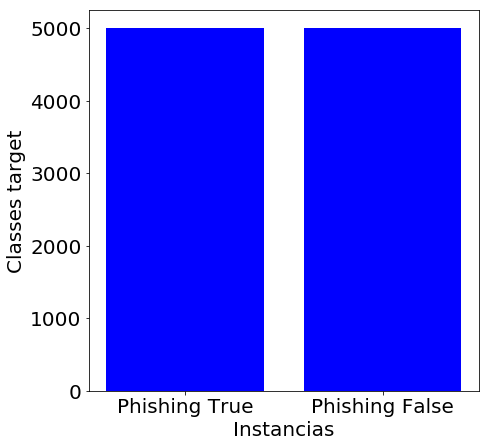

In [32]:
import matplotlib.pyplot as plt
countClass1 = 0
countClass2 = 0

for y in Y:
    if(y == 1):
        countClass1 += 1
    else:
        countClass2 += 1
        
print(countClass1)
plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 20})

plt.bar(['Phishing True', 'Phishing False'], [countClass1, countClass2], align='center', color="blue")
plt.xlabel("Instancias")
plt.ylabel("Classes target")

plt.show()

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
#y_pred_gbr = cross_val_score(gbr, X, Y, scoring='accuracy', cv=5
gbr.fit(xTrain, yTrain)
y_predict_rfc = gbr.predict(xTest)
for i in range(len(y_predict_rfc)):
    if(y_predict_rfc[i] > 0.5):
        y_predict_rfc[i] = 1.0
    else:
        y_predict_rfc[i] = 0.0




In [134]:
accuracy_score( y_predict_rfc, yTest, normalize=True)


0.964

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
y_pred_rfc = cross_val_predict(rfc, X, Y, cv=5)
y_pred_rfc

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, accuracy_score,recall_score, f1_score, confusion_matrix


def calculateMetrics(y_pred, Y):
    return (accuracy_score(y_pred, Y), roc_auc_score(y_pred, Y),
            f1_score(y_pred, Y), recall_score(y_pred, Y),precision_score(y_pred, Y),
           confusion_matrix(Y, y_pred_rfc).ravel())

print('Acuraccy', accuracy_score(y_pred_rfc, Y))
print('Roc_auc_score', roc_auc_score(y_pred_rfc, Y))
print('F1-score', f1_score(y_pred_rfc, Y))
print('Recall', recall_score(y_pred_rfc, Y))
print('Precision', precision_score(y_pred_rfc, Y))

metrics = calculateMetrics(y_pred_rfc, Y)
print(metrics)
print(confusion_matrix(Y, y_pred_rfc).ravel()) #tn, fp, fn, tp

Acuraccy 0.9737
Roc_auc_score 0.9737659671732692
F1-score 0.9735439090634744
Recall 0.9793564055859137
Precision 0.9678
(0.9737, 0.9737659671732692, 0.9735439090634744, 0.9793564055859137, 0.9678, array([4898,  102,  161, 4839]))
[4898  102  161 4839]


In [58]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X.astype(float), Y.astype(float))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
regr.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.29305253e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.64861988e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.99005776e-01, 0.00000000e+00,
       0.00000000e+00, 1.80332424e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.10131707e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.90333035e-01])

In [12]:
rfc.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [10]:
import numpy as np

rankListRFC = list()
featuresImportance = rfc.feature_importances_
for i in range(len(featuresImportance)):
    index = np.argmax(featuresImportance)
    rankListRFC.append((index, columList[index], featuresImportance[index]))
    featuresImportance[index] = - 1000
    

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [55]:
rankListRFC.sort(key=lambda x: x[2])
rankListRFC

[(19, 'HttpsInHostname', 0.0),
 (6, 'AtSymbol', 0.0001027496592965877),
 (35, 'FakeLinkInStatusBar', 0.00010451587263242775),
 (12, 'NumHash', 0.00018046217557720191),
 (23, 'DoubleSlashInPath', 0.00023888554730708213),
 (37, 'PopUpWindow', 0.00026582916939638036),
 (7, 'TildeSymbol', 0.0006086006624597855),
 (41, 'ImagesOnlyInForm', 0.0008733809483423452),
 (36, 'RightClickDisabled', 0.0014370792806266664),
 (32, 'AbnormalFormAction', 0.0015009310526809645),
 (14, 'NoHttps', 0.0017467215148052435),
 (17, 'DomainInSubdomains', 0.0018624455310881072),
 (40, 'MissingTitle', 0.0022172607628496584),
 (25, 'EmbeddedBrandName', 0.0022795578205531165),
 (42, 'SubdomainLevelRT', 0.002428862196644328),
 (31, 'ExtFormAction', 0.002647903610420865),
 (9, 'NumPercent', 0.0028370385151386623),
 (15, 'RandomString', 0.0033837626624969503),
 (18, 'DomainInPaths', 0.0033875321121463187),
 (16, 'IpAddress', 0.004232376978403508),
 (45, 'AbnormalExtFormActionR', 0.00439253806740555),
 (43, 'UrlLengthRT'

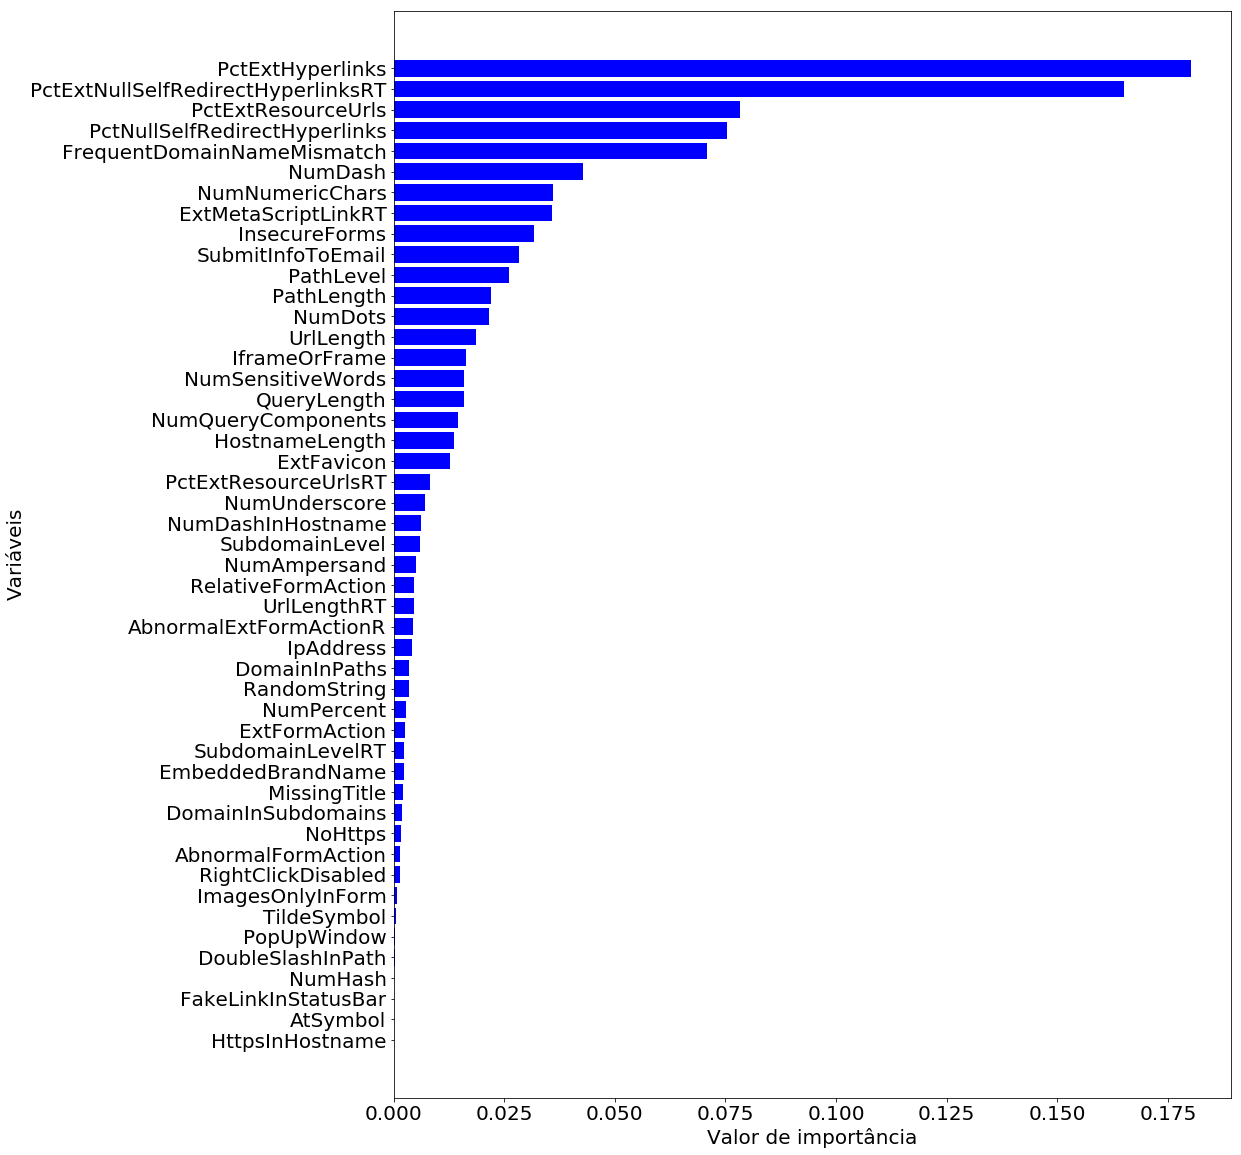

In [59]:
import numpy as np
import matplotlib.pyplot as plt
x = list()
y = list()
for e in rankListRFC:
    x.append(e[1])
    y.append(e[2])
    

plt.figure(figsize=(15, 20))
plt.rcParams.update({'font.size': 20})

plt.barh(x, y, align='center', color="blue")
plt.xlabel("Vdalor de importância")
plt.ylabel("Variáveis")

plt.show()

In [14]:
from RandonForest import busca_melhores_features
from utils import seleciona_variaveis_RNE

#RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

#x_new, y, lista = seleciona_variaveis_RNE(RFC, df, 48)

len(df.columns)

49

In [ ]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
x_new, y, lista = seleciona_variaveis_RNE(tree, df, 45)

In [13]:
from sklearn.svm import SVC

sv = SVC(C=1, gamma='scale', kernel = 'linear')
x_new, y, lista = seleciona_variaveis_RNE(sv, df, 45)

Variaveis Retiradas:  [('NumNumericChars', 13), ('HttpsInHostname', 19), ('AbnormalExtFormActionR', 45)]


In [30]:
# programa - calculando lista

def RankList(dic_sfs, df):
    rankList = list()
    rankListName = list()
    name = df.columns
    x = dic_sfs.subsets_
    for i in range(1, 49):
        candidates = x[i]['feature_idx']
        for j in range(0, i):
            if(candidates[j] not in rankList):
                rankList.append(candidates[j])
                rankListName.append(name[candidates[j]])
    return rankListName

In [17]:
def calculateListSFS(rfc, tree, svm, df):
    sfsrfc = busca_melhores_features(rfc, df)
    sfstree = busca_melhores_features(tree, df)
    sfssvm = busca_melhores_features(svm, df)
    
    
    


NameError: name 'DF' is not defined

In [20]:
from sys import argv
from utils import carregar_base, seleciona_variaveis_SFS
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from classificadores import busca_melhores_features
import matplotlib.pyplot as plt
from sklearn import tree
import pickle

RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
sfs =  busca_melhores_features(RFC, df)
list_RFC = RankList(sfs)
'''
tree = tree.DecisionTreeClassifier()
sfs2 = busca_melhores_features(tree, df)
list_tree = RankList(sfs2)

SVM = SVC(C=1, gamma='scale', kernel = 'linear')
sfs3 = busca_melhores_features(SVM, df)
list_SVM = RankList(sfs3)
'''



KeyError: "['Result'] not found in axis"

In [28]:
#sfslist
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def sfsListSelect(model, df):
    n_features = len(df.columns)-1
    sfs = SFS(model, k_features=n_features, forward=True,
            floating=False, verbose=2, scoring='accuracy', cv=5,
            n_jobs=-1)
    X = df.drop('CLASS_LABEL',axis=1)
    Y = df['CLASS_LABEL'].astype('int32')
    sfs.fit(X, Y)
    return RankList(sfs)
    

In [31]:
sfsListSelect(RFC, df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   25.5s finished

[2019-11-15 11:34:01] Features: 1/48 -- score: 0.9098[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  1.2min finished

[2019-11-15 11:35:16] Features: 2/48 -- score: 0.9423999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:  1.1min finished

[2019-11-15 11:36:24] Features: 3/48 -- score: 0.9521000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elap

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   23.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   23.8s finished

[2019-11-15 12:05:20] Features: 37/48 -- score: 0.9797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.8s finished

[2019-11-15 12:05:44] Features: 38/48 -- score: 0.9793000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.0s finished

[2019-11-15 12:06:05] Features: 39/48 -- score: 0.9789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   16.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   19.3s finished

[2019-11-15 12:06:25] Features: 40/48 -- score: 0.9785999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Paral

[26,
 33,
 27,
 29,
 34,
 11,
 28,
 39,
 14,
 38,
 45,
 2,
 24,
 10,
 36,
 44,
 46,
 6,
 42,
 31,
 5,
 16,
 19,
 17,
 25,
 41,
 9,
 0,
 4,
 47,
 23,
 12,
 22,
 30,
 32,
 8,
 7,
 1,
 37,
 15,
 21,
 20,
 40,
 43,
 18,
 35,
 13,
 3]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def treeListSelect(df):
    X = df.drop('CLASS_LABEL',axis=1)
    Y = df['CLASS_LABEL'].astype('int32')
    rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
    rfc.fit(X, Y)
    columList = df.columns
    rankListRFC = list()
    featuresImportance = rfc.feature_importances_
    for i in range(len(featuresImportance)):h
        index = np.argmax(featuresImportance)
        rankListRFC.append(columList[index])
        featuresImportance[index] = - 1000

In [ ]:
lista = [1,2,3]
list2 = [3, 2, 1]
lista3 = [3, 2, 2]
lista4 = [lista, lista2, lista3]
for e in lista4:
    print(e)
    
def avaliaModelLista(rankList, model, df):
    
    X = df.drop('CLASS_LABEL',axis=1)
    Y = df['CLASS_LABEL'].astype('int32')
    y_pred = cross_val_predict(model, X, Y, cv=5)
    allMetrics = list()
    acuracy = list()
    allMetrics.append(calculateMetrics(y_pred, Y))    
    acuracy.append(allMetrics[0][0])
    
    for feature in rankList:
        X = X.drop(feature, axis = 1)
        varNumber += 1
        allMetrics.append(calculateMetrics(y_pred, Y))    
        acuracy.append(allMetrics[varNumber][0])  

    return allMetrics, acuracy


In [ ]:
def plotGrafico(acc_RFC, acc_Tree, acc_SVM, path):
    x = range(1, 49)
    
    plt.plot(x, acc_Tree, 'o', color = 'blue' )
    plt.plot(x, acc_Tree, label = 'Decision-Tree', color = 'blue')

    plt.plot(x, acc_RFC, 'o', color = 'red')
    plt.plot(x, acc_RFC, label = 'RFC', color = 'red')

    plt.plot(x, acc_SVM, 'o', color = 'green')
    plt.plot(x, acc_SVM, label = 'SVM',color = 'green')

    plt.xlabel('Número de variáveis')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.savefig(path)


In [ ]:
def seleciona_variaveis_RFE_Metrics(model, dados, num_variaveis):
    X = dados.drop('CLASS_LABEL',axis=1).astype('int32')
    Y = dados['CLASS_LABEL'].astype('int32')
    rfe = RFE(model, step=1, n_features_to_select = num_variaveis).fit(X, Y)

    # gera lista de variaveis para serem retiradas
    featuresNames = X.iloc[0].index
    featuresDrops = list()

    for i in range(0,len(featuresNames)):
        if(not rfe.support_[i]):
            FeaturesDrops.append((i, featuresNames[i]))
    
    # gera novos conjuntos de treinamento excluindo as variaveis
    X_new = X
    for i in range(0, len(featuresDrops)):
        X_new = X_new.drop(featuresNames[i], axis = 1)
    return calculateMetrics(y_pred, Y)


    

In [ ]:
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
tree = tree.DecisionTreeClassifier()
SVM = SVC(C=1, gamma='scale', kernel = 'linear')

rankListRFC = sfsListSelect(RFC, df)
rankListTree = sfsListSelect(tree, df)
rankListSVM = sfsListSelect(SVM, df)

allMetricsRFC, acc_RFC = avaliaModelLista(rankListRFC, RFC, df)
allMetricsTree, acc_Tree = avaliaModelLista(rankListTree, tree, df)
allMetricsSVM, acc_SVM = avaliaModelLista(rankListSVM, SVM, df)

plotGrafico(acc_RFC, acc_Tree, acc_SVM, 'GraficoSVS.png')


rfc1 = open('rfcsfs.txt', w)
for e in allMetricsRFC:
    rfc1.write(str(e) + '\n')
    
tree1 = open('treefs.txt', w)
for e in allMetricsTree:
    tree1.write(str(e) + '\n')
    
svm1 = open('svmsfs.txt', w)
for e in allMetricsSVM:
    svm1.write(str(e) + '\n')


# rfe
allMetricsRFC2 = list()
acc_RFC2 = list()
for i in range(0, 48):
    k = seleciona_variaveis_RFE_Metrics(RFC, df, 48-i)
    allMetricsRFC2.append(k);
    acc_RFC2.append(allMetricsRFC2[i][0])
    
allMetricsTree2 = list()
acc_Tree2 = list()
for i in range(0, 48):
    k = seleciona_variaveis_RFE_Metrics(tree, df, 48-i)
    allMetricsTree2.append(k);
    acc_Tree2.append(allMetricsTree2[i][0])
    
allMetricsSVM2 = list()
acc_SVM2 = list()
for i in range(0, 48):
    k = seleciona_variaveis_RFE_Metrics(SVM, df, 48-i)
    allMetricsSVM2.append(k);
    acc_SVM2.append(allMetricsSVM2[i][0])

plotGrafico(acc_RFC2, acc_Tree2, acc_SVM2, 'GraficoRFE.png')

rfc2 = open('rfcrfe.txt', w)
for e in allMetricsRFC2:
    rfc2.write(str(e) + '\n')
    
tree2 = open('treerfe.txt', w)
for e in allMetricsTree2:
    tree2.write(str(e) + '\n')
    
svm2 = open('svmrfe.txt', w)
for e in allMetricsSVM2:
    svm2.write(str(e) + '\n')

# rank por random forest
rankListImportanceRFC3 = treeListSelect(df)
allMetricsRFC3, acc_RFC3 = avaliaModelLista(rankListImportanceRFC, RFC, df)
allMetricsTree3, acc_Tree3 = avaliaModelLista(rankListImportanceRFC, tree, df)
allMetricsSVM3, acc_SVM3 = avaliaModelLista(rankListImportanceRFC, SVM, df)

plotGrafico(acc_RFC3, acc_Tree3, acc_SVM3, 'GraficoRFCSelect.png')


rfc3 = open('rfcES.txt', w)
for e in allMetricsRFC3:
    rfc3.write(str(e) + '\n')
    
tree3 = open('treeES.txt', w)
for e in allMetricsTree3:
    tree3.write(str(e) + '\n')
    
svm3 = open('svmES.txt', w)
for e in allMetricsSVM3:
    svm3.write(str(e) + '\n')

